['attrition', 'gender', 'marital_status', 'education_level', 'months_inactive', 'contacts_in_year', 'number_of_products', 'dependent_count', 'income', 'credit_limit', 'txn_in_year', 'avg_utilization', 'months_on_book', 'card']


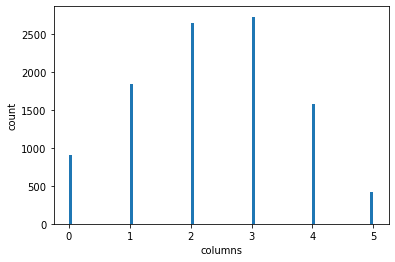

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def pre_processing(df: pd.DataFrame) -> pd.DataFrame:

    # impute education level, income, marital status
    top_education = df['Education_Level'].value_counts().reset_index()['index'][0]
    df['Education_Level'].replace({'Unknown': top_education}, inplace=True)

    top_income = df['Income_Category'].value_counts().reset_index()['index'][0]
    df['Income_Category'].replace({'Unknown': top_income}, inplace=True)

    top_marital = df['Marital_Status'].value_counts().reset_index()['index'][0]
    df['Marital_Status'].replace({'Unknown': top_marital}, inplace=True)

    # convert columns with categorical values to numerical values
    df['attrition'] = np.where(df['Attrition_Flag'] == 'Existing Customer', 0, 1).astype(int)

    df['gender'] = np.where(df['Gender'] == 'F', 0, 1).astype(int)

    df['marital_status'] = np.where(df['Marital_Status'] == 'Married', 1, 0).astype(int)

    df['education_level'] = np.where(df['Education_Level'] == 'Uneducated', 0,
                                     np.where(df['Education_Level'] == 'High School', 0, 1).astype(int))

    df['months_inactive'] = np.where(df['Months_Inactive_12_mon'] > 3, 0, 1).astype(int)

    df['contacts_in_year'] = np.where(df['Contacts_Count_12_mon'] > 3, 0, 1).astype(int)

    df['number_of_products'] = np.where(df['Total_Relationship_Count'] >= 3, 0, 1).astype(int)

    df['dependent_count'] = np.where(df['Dependent_count'] < 3, 0, 1).astype(int)

    df['income'] = 0
    conditions = [(df['Income_Category'] == 'Less than $40K'),
                  (df['Income_Category'] == '$40K - $60K'),
                  (df['Income_Category'] == '$60K - $80K'),
                  (df['Income_Category'] == '$80K - $120K'),
                  (df['Income_Category'] == '$120K +')]
    choices = [0, 1, 2, 3, 4]
    df['income'] = np.select(conditions, choices).astype(int)

    df['credit_limit'] = 0
    conditions = [(df['Credit_Limit'] <= 2000),
                  (df['Credit_Limit'] > 2000) & (df['Credit_Limit'] <= 3000),
                  (df['Credit_Limit'] > 3000) & (df['Credit_Limit'] <= 5000),
                  (df['Credit_Limit'] > 5000) & (df['Credit_Limit'] <= 6000),
                  (df['Credit_Limit'] > 6000)]
    choices = [0, 1, 2, 3, 4]
    df['credit_limit'] = np.select(conditions, choices).astype(int)

    df['txn_in_year'] = 0
    conditions = [(df['Total_Trans_Ct'] <= 20),
                  (df['Total_Trans_Ct'] > 20) & (df['Credit_Limit'] <= 40),
                  (df['Total_Trans_Ct'] > 40) & (df['Credit_Limit'] <= 60),
                  (df['Total_Trans_Ct'] > 60) & (df['Credit_Limit'] <= 80),
                  (df['Total_Trans_Ct'] > 80) & (df['Credit_Limit'] <= 90),
                  (df['Total_Trans_Ct'] > 90)]
    choices = [0, 1, 2, 3, 4, 5]
    df['txn_in_year'] = np.select(conditions, choices).astype(int)

    df['avg_utilization'] = 0
    conditions = [(df['Avg_Utilization_Ratio'] <= 0.10),
                  (df['Avg_Utilization_Ratio'] > 0.10) & (df['Credit_Limit'] <= 0.20),
                  (df['Avg_Utilization_Ratio'] > 0.20) & (df['Credit_Limit'] <= 0.30),
                  (df['Avg_Utilization_Ratio'] > 0.30) & (df['Credit_Limit'] <= 0.40),
                  (df['Avg_Utilization_Ratio'] > 0.40)]
    choices = [0, 1, 2, 3, 4]
    df['avg_utilization'] = np.select(conditions, choices).astype(int)

    df['months_on_book'] = 0
    conditions = [(df['Months_on_book'] <= 12),
                  (df['Months_on_book'] > 12) & (df['Credit_Limit'] <= 24),
                  (df['Months_on_book'] > 24) & (df['Credit_Limit'] <= 36),
                  (df['Months_on_book'] > 36) & (df['Credit_Limit'] <= 48),
                  (df['Months_on_book'] > 48)]
    choices = [0, 1, 2, 3, 4]
    df['months_on_book'] = np.select(conditions, choices).astype(int)

    df['card'] = 0
    conditions = [(df['Card_Category'] == 'Blue'),
                  (df['Card_Category'] == 'Silver'),
                  (df['Card_Category'] == 'Gold'),
                  (df['Card_Category'] == 'Platinum')]
    choices = [0, 1, 2, 3]
    df['card'] = np.select(conditions, choices).astype(int)

    # drop unnecessary columns
    df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
             'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
             'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
            axis=1, inplace=True, errors='ignore')

    # rename client column
    df.rename(columns={'CLIENTNUM': 'client_id'}, inplace=True)

    # set index to client_id
    df.set_index('client_id', inplace=True)
    return df


# # for checking only
df = pd.read_csv(r'C:\Users\schou\Downloads\archive\BankChurners.csv')
df2 = pre_processing(df)
print(df2.columns.to_list())

# # just to check histogram and distribution of data
df = pd.read_csv(r'C:\Users\schou\Downloads\archive\BankChurners.csv')
plt.hist(df['Dependent_count'], bins=100)
# # set x/y labels and plot title
plt.xlabel('columns')
plt.ylabel('count')
plt.show()

<AxesSubplot:>

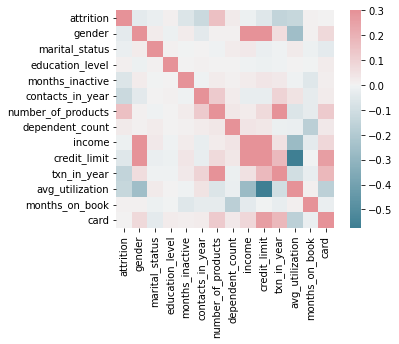

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df2.corr('pearson'), cmap=cmap, vmax=.3, center=0,
square=True)

In [20]:
X =  df2.drop(['attrition'], axis=1)
y = df2['attrition']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1717
           1       0.54      0.20      0.29       309

    accuracy                           0.85      2026
   macro avg       0.71      0.58      0.60      2026
weighted avg       0.82      0.85      0.82      2026

0.8519249753208292


<AxesSubplot:>

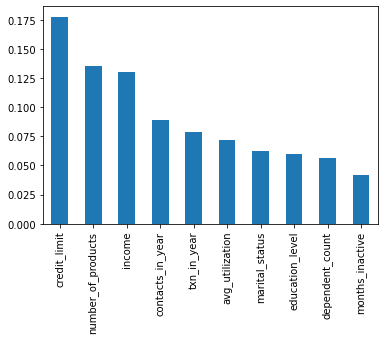

In [24]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')